In [1]:
import pandas as pd 
import re as re # Regex

In [49]:
df = pd.read_csv('sewakost_40pages.tsv', sep="\t")

df.head()

,url,nama,harga,jenis,address,aircon,free_wifi,kamar_mandi_dalam,fasilitas_kamar,fasilitas_kost
0,https://www.sewakost.com/jakarta/selatan/kost-...,Kost Ciganjur Jalan Pasir No. 32,Rp 1.000.000,Kost Campur,Jalan Pasir no 32 Kp. Setu Rt 001/006 Keluraha...,Tidak,Tidak,Ya,['Kamar Mandi Dalam'],"['Keamanan', 'Parkir Motor']"
1,https://www.sewakost.com/jakarta/selatan/kost-...,KOST EXECUTIVE JAGAKARSA PASO CILANDAK JAKARTA...,Rp 2.200.000,Kost Putra,"Jalan Paso no 6A, Jagakarsa, Cilandak, Jakarta...",Ya,Ya,Ya,"['Spring Bed', 'Perabot', 'Free WiFi', 'AC', '...","['Ruang Tamu', 'Ruang Makan', 'Dapur', 'Air Mi..."
2,https://www.sewakost.com/jakarta/selatan/kamar...,Kamar kost Putri NON AC di Mampang,Rp 850.000,Kost Putri,Jl.Mampang Prapatan VI Rt04 Rw02 No.70B,Tidak,Tidak,Tidak,[],[]
3,https://www.sewakost.com/jakarta/selatan/hompy...,Hompy Timur Residence,Rp 2.700.000,Kost Putri,Tebet Timur Dalam 7B no. 11,Ya,Ya,Ya,"['Spring Bed', 'Perabot', 'Free WiFi', 'AC', '...","['Dapur', 'Cuci Setrika', 'Pembantu', 'Keamana..."
4,https://www.sewakost.com/jakarta/selatan/rumah...,Rumah kontrakan (40m2) Pasutri baru/karyawati/...,Rp 2.500.000,Kost Pasutri,Jalan keselamatan 18 RT10/RW03,Ya,Tidak,Ya,"['AC', 'Kamar Mandi Dalam']","['Ruang Tamu', 'Ruang Makan', 'Dapur', 'Keaman..."


In [50]:
# Terdapat kost dengan nilai NaN pada jenis dan fasilitas kost
df.isnull().sum()

url                   0
nama                  0
harga                 0
jenis                14
address              14
aircon               14
free_wifi            14
kamar_mandi_dalam    14
fasilitas_kamar      14
fasilitas_kost       14
dtype: int64

In [51]:
df[df.isnull().any(axis=1)].head()

,url,nama,harga,jenis,address,aircon,free_wifi,kamar_mandi_dalam,fasilitas_kamar,fasilitas_kost
483,https://www.sewakost.com/jakarta/selatan/indek...,INDEKOS ELITE DALAM CLUSTER FULL FURNISH,3.000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,https://www.sewakost.com/jakarta/selatan/tebet...,TEBET EXECUTIVE RESIDENCE 141,3.550.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,https://www.sewakost.com/jakarta/selatan/sewa-...,"Sewa Kost, Cilandak Barat, Jakarta Selatan",2.000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,https://www.sewakost.com/jakarta/selatan/kos-d...,Kos di Lt.Agung dkt KRL Lt.Agung & Tj.Brt,700.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,https://www.sewakost.com/jakarta/selatan/kost-...,Kost Wanita Tebet Dekat Pasar Tebet Barat dan ...,1.600.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Drop semua baris dengan nilai NaN karena tidak dapat digunakan untuk tahap analisis
df.dropna(inplace=True)

df.isnull().sum()

url                  0
nama                 0
harga                0
jenis                0
address              0
aircon               0
free_wifi            0
kamar_mandi_dalam    0
fasilitas_kamar      0
fasilitas_kost       0
dtype: int64

In [53]:
# Mengambil setiap nilai numerik kemudian mengubah ke dalam bentuk integer
def find_number(text):
    try:
        num = "".join(re.findall(r'[\d]+',text))
        return int(num)
    except:
        return 0

In [54]:
# Mengubah seluruh kolom harga menjadi integer
df['harga'] = df['harga'].apply(lambda x: find_number(x))

df.head()

,url,nama,harga,jenis,address,aircon,free_wifi,kamar_mandi_dalam,fasilitas_kamar,fasilitas_kost
0,https://www.sewakost.com/jakarta/selatan/kost-...,Kost Ciganjur Jalan Pasir No. 32,1000000,Kost Campur,Jalan Pasir no 32 Kp. Setu Rt 001/006 Keluraha...,Tidak,Tidak,Ya,['Kamar Mandi Dalam'],"['Keamanan', 'Parkir Motor']"
1,https://www.sewakost.com/jakarta/selatan/kost-...,KOST EXECUTIVE JAGAKARSA PASO CILANDAK JAKARTA...,2200000,Kost Putra,"Jalan Paso no 6A, Jagakarsa, Cilandak, Jakarta...",Ya,Ya,Ya,"['Spring Bed', 'Perabot', 'Free WiFi', 'AC', '...","['Ruang Tamu', 'Ruang Makan', 'Dapur', 'Air Mi..."
2,https://www.sewakost.com/jakarta/selatan/kamar...,Kamar kost Putri NON AC di Mampang,850000,Kost Putri,Jl.Mampang Prapatan VI Rt04 Rw02 No.70B,Tidak,Tidak,Tidak,[],[]
3,https://www.sewakost.com/jakarta/selatan/hompy...,Hompy Timur Residence,2700000,Kost Putri,Tebet Timur Dalam 7B no. 11,Ya,Ya,Ya,"['Spring Bed', 'Perabot', 'Free WiFi', 'AC', '...","['Dapur', 'Cuci Setrika', 'Pembantu', 'Keamana..."
4,https://www.sewakost.com/jakarta/selatan/rumah...,Rumah kontrakan (40m2) Pasutri baru/karyawati/...,2500000,Kost Pasutri,Jalan keselamatan 18 RT10/RW03,Ya,Tidak,Ya,"['AC', 'Kamar Mandi Dalam']","['Ruang Tamu', 'Ruang Makan', 'Dapur', 'Keaman..."


In [55]:
df.describe()

,harga
count,9.440000e+02
mean,3.816841e+09
std,8.280764e+10
min,0.000000e+00
25%,1.000000e+06
50%,1.650000e+06
75%,2.350000e+06
max,1.800000e+12


In [56]:
# Drop harga kos di bawah 300rb dan di atas 5 juta
df = df[(df['harga']>=300000) & (df['harga']<=5000000)]

df.shape

(872, 10)

In [57]:
df['jenis'].unique()

array(['Kost Campur', 'Kost Putra', 'Kost Putri', 'Kost Pasutri',
       'Kost Keluarga'], dtype=object)

In [58]:
df.dtypes

url                  object
nama                 object
harga                 int64
jenis                object
address              object
aircon               object
free_wifi            object
kamar_mandi_dalam    object
fasilitas_kamar      object
fasilitas_kost       object
dtype: object

In [59]:
# Mengubah jenis kost pasutri -> kost keluarga
df['jenis'] = df['jenis'].replace('Kost Pasutri', 'Kost Keluarga')

# Mengubah ke dalam bentuk kategorikal
categorical = ['jenis', 'aircon', 'free_wifi', 'kamar_mandi_dalam']
df[categorical] = df[categorical].astype('category')

df.dtypes

url                    object
nama                   object
harga                   int64
jenis                category
address                object
aircon               category
free_wifi            category
kamar_mandi_dalam    category
fasilitas_kamar        object
fasilitas_kost         object
dtype: object

1. Get unique in `fasilitas_kamar`
2. Looping dan ekstrak setiap fasilitas
3. Fasilitas dibuat menjadi kolom baru
4. Iterasi setiap baris pada dataframe dan cek kolom fasilitas kamar (iterasi lagi per kolom fasilitas yang baru) pakai `is in` maybe. Jika ada maka `Yes` atau `1` di kolom per fasilitas.

In [60]:
def get_fasilitas(data_fasilitas):
    fasilitas = []
    for n in data_fasilitas:
        data = n[1:-1]
        if data == "":
            continue
        list_fas = data.replace("'", "").split(", ")
        for fas in list_fas:
            if fas not in fasilitas:
                fasilitas.append(fas)
    
    return fasilitas

In [61]:
fasilitas_kamar = get_fasilitas(df['fasilitas_kamar'].unique())
print(fasilitas_kamar)

fasilitas_kost = get_fasilitas(df['fasilitas_kost'].unique())
print(fasilitas_kost)

['Kamar Mandi Dalam', 'Spring Bed', 'Perabot', 'Free WiFi', 'AC', 'TV', 'Pemanas Air (Water Heater)', 'Kulkas']
['Keamanan', 'Parkir Motor', 'Ruang Tamu', 'Ruang Makan', 'Dapur', 'Air Minum', 'Pembantu', 'Parkir Mobil', 'Cuci Setrika', 'Mesin Cuci (Cuci Sendiri)', 'Televisi']


In [62]:
# Karena sudah ada kolom untuk ini
remove_fasilitas = ['Kamar Mandi Dalam', 'AC', 'Free WiFi']

for fas in remove_fasilitas:
    fasilitas_kamar.remove(fas)

print(fasilitas_kamar)

['Spring Bed', 'Perabot', 'TV', 'Pemanas Air (Water Heater)', 'Kulkas']


In [63]:
def get_info(fas_kamar, fas):
    data = []
    for row in fas_kamar:
        status = "Ya" if fas in row else "Tidak"
        data.append(status)
    return data

In [64]:
for fas in fasilitas_kamar:
    kolom_baru = fas + "_fkamar"
    df[kolom_baru] = get_info(df['fasilitas_kamar'], fas)

for fas in fasilitas_kost:
    kolom_baru = fas + "_fkost"
    df[kolom_baru] = get_info(df['fasilitas_kost'], fas)

In [70]:
df = df.drop(['fasilitas_kamar', 'fasilitas_kost'], axis=1)

In [72]:
df.head()

,url,nama,harga,jenis,address,aircon,free_wifi,kamar_mandi_dalam,Spring Bed_fkamar,Perabot_fkamar,...,Parkir Motor_fkost,Ruang Tamu_fkost,Ruang Makan_fkost,Dapur_fkost,Air Minum_fkost,Pembantu_fkost,Parkir Mobil_fkost,Cuci Setrika_fkost,Mesin Cuci (Cuci Sendiri)_fkost,Televisi_fkost
0,https://www.sewakost.com/jakarta/selatan/kost-...,Kost Ciganjur Jalan Pasir No. 32,1000000,Kost Campur,Jalan Pasir no 32 Kp. Setu Rt 001/006 Keluraha...,Tidak,Tidak,Ya,Tidak,Tidak,...,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
1,https://www.sewakost.com/jakarta/selatan/kost-...,KOST EXECUTIVE JAGAKARSA PASO CILANDAK JAKARTA...,2200000,Kost Putra,"Jalan Paso no 6A, Jagakarsa, Cilandak, Jakarta...",Ya,Ya,Ya,Ya,Ya,...,Ya,Ya,Ya,Ya,Ya,Ya,Ya,Tidak,Tidak,Tidak
2,https://www.sewakost.com/jakarta/selatan/kamar...,Kamar kost Putri NON AC di Mampang,850000,Kost Putri,Jl.Mampang Prapatan VI Rt04 Rw02 No.70B,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
3,https://www.sewakost.com/jakarta/selatan/hompy...,Hompy Timur Residence,2700000,Kost Putri,Tebet Timur Dalam 7B no. 11,Ya,Ya,Ya,Ya,Ya,...,Ya,Tidak,Tidak,Ya,Tidak,Ya,Tidak,Ya,Tidak,Tidak
4,https://www.sewakost.com/jakarta/selatan/rumah...,Rumah kontrakan (40m2) Pasutri baru/karyawati/...,2500000,Kost Keluarga,Jalan keselamatan 18 RT10/RW03,Ya,Tidak,Ya,Tidak,Tidak,...,Ya,Ya,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak


In [73]:
df.shape

(872, 24)

In [74]:
df.to_csv('sewakost_clean.tsv', sep="\t", index = False)

In [5]:
import pandas as pd
import numpy as np

In [6]:
kost_clean = pd.read_csv('sewakost_clean.tsv', sep="\t")

kost_clean.head(5)

,url,nama,harga,jenis,address,aircon,free_wifi,kamar_mandi_dalam,Spring Bed_fkamar,Perabot_fkamar,...,Parkir Motor_fkost,Ruang Tamu_fkost,Ruang Makan_fkost,Dapur_fkost,Air Minum_fkost,Pembantu_fkost,Parkir Mobil_fkost,Cuci Setrika_fkost,Mesin Cuci (Cuci Sendiri)_fkost,Televisi_fkost
0,https://www.sewakost.com/jakarta/selatan/kost-...,Kost Ciganjur Jalan Pasir No. 32,1000000,Kost Campur,Jalan Pasir no 32 Kp. Setu Rt 001/006 Keluraha...,Tidak,Tidak,Ya,Tidak,Tidak,...,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
1,https://www.sewakost.com/jakarta/selatan/kost-...,KOST EXECUTIVE JAGAKARSA PASO CILANDAK JAKARTA...,2200000,Kost Putra,"Jalan Paso no 6A, Jagakarsa, Cilandak, Jakarta...",Ya,Ya,Ya,Ya,Ya,...,Ya,Ya,Ya,Ya,Ya,Ya,Ya,Tidak,Tidak,Tidak
2,https://www.sewakost.com/jakarta/selatan/kamar...,Kamar kost Putri NON AC di Mampang,850000,Kost Putri,Jl.Mampang Prapatan VI Rt04 Rw02 No.70B,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
3,https://www.sewakost.com/jakarta/selatan/hompy...,Hompy Timur Residence,2700000,Kost Putri,Tebet Timur Dalam 7B no. 11,Ya,Ya,Ya,Ya,Ya,...,Ya,Tidak,Tidak,Ya,Tidak,Ya,Tidak,Ya,Tidak,Tidak
4,https://www.sewakost.com/jakarta/selatan/rumah...,Rumah kontrakan (40m2) Pasutri baru/karyawati/...,2500000,Kost Keluarga,Jalan keselamatan 18 RT10/RW03,Ya,Tidak,Ya,Tidak,Tidak,...,Ya,Ya,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak


In [7]:
kost_clean.iloc[:, 5:].head()

,aircon,free_wifi,kamar_mandi_dalam,Spring Bed_fkamar,Perabot_fkamar,TV_fkamar,Pemanas Air (Water Heater)_fkamar,Kulkas_fkamar,Keamanan_fkost,Parkir Motor_fkost,Ruang Tamu_fkost,Ruang Makan_fkost,Dapur_fkost,Air Minum_fkost,Pembantu_fkost,Parkir Mobil_fkost,Cuci Setrika_fkost,Mesin Cuci (Cuci Sendiri)_fkost,Televisi_fkost
0,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
1,Ya,Ya,Ya,Ya,Ya,Ya,Tidak,Tidak,Tidak,Ya,Ya,Ya,Ya,Ya,Ya,Ya,Tidak,Tidak,Tidak
2,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
3,Ya,Ya,Ya,Ya,Ya,Tidak,Ya,Tidak,Ya,Ya,Tidak,Tidak,Ya,Tidak,Ya,Tidak,Ya,Tidak,Tidak
4,Ya,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Ya,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak


In [8]:
kost_clean.iloc[:, 5:] = np.where(kost_clean.iloc[:, 5:] == 'Ya', 1, 0)

In [9]:
kost_clean.iloc[:, 5:].head()

,aircon,free_wifi,kamar_mandi_dalam,Spring Bed_fkamar,Perabot_fkamar,TV_fkamar,Pemanas Air (Water Heater)_fkamar,Kulkas_fkamar,Keamanan_fkost,Parkir Motor_fkost,Ruang Tamu_fkost,Ruang Makan_fkost,Dapur_fkost,Air Minum_fkost,Pembantu_fkost,Parkir Mobil_fkost,Cuci Setrika_fkost,Mesin Cuci (Cuci Sendiri)_fkost,Televisi_fkost
0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0
4,1,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0


In [10]:
kost_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   url                                872 non-null    object
 1   nama                               872 non-null    object
 2   harga                              872 non-null    int64 
 3   jenis                              872 non-null    object
 4   address                            872 non-null    object
 5   aircon                             872 non-null    int64 
 6   free_wifi                          872 non-null    int64 
 7   kamar_mandi_dalam                  872 non-null    int64 
 8   Spring Bed_fkamar                  872 non-null    int64 
 9   Perabot_fkamar                     872 non-null    int64 
 10  TV_fkamar                          872 non-null    int64 
 11  Pemanas Air (Water Heater)_fkamar  872 non-null    int64 
 12  Kulkas_f

In [11]:
kost_clean.describe()

,harga,aircon,free_wifi,kamar_mandi_dalam,Spring Bed_fkamar,Perabot_fkamar,TV_fkamar,Pemanas Air (Water Heater)_fkamar,Kulkas_fkamar,Keamanan_fkost,Parkir Motor_fkost,Ruang Tamu_fkost,Ruang Makan_fkost,Dapur_fkost,Air Minum_fkost,Pembantu_fkost,Parkir Mobil_fkost,Cuci Setrika_fkost,Mesin Cuci (Cuci Sendiri)_fkost,Televisi_fkost
count,8.720000e+02,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,1.825345e+06,0.743119,0.737385,0.790138,0.597477,0.447248,0.228211,0.215596,0.144495,0.388761,0.643349,0.395642,0.260321,0.508028,0.290138,0.178899,0.315367,0.147936,0.111239,0.176606
std,9.535121e+05,0.437164,0.440307,0.407444,0.490688,0.497495,0.419920,0.411471,0.351793,0.487749,0.479286,0.489269,0.439062,0.500222,0.454086,0.383488,0.464929,0.355240,0.314608,0.381553
min,4.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.650000e+06,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.300000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
correlation_matrix = kost_clean.corr().round(2)

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

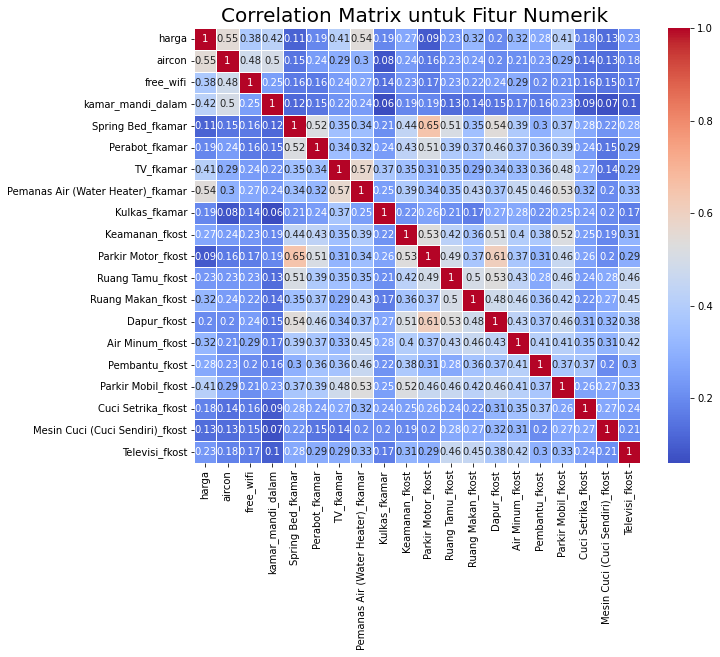

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

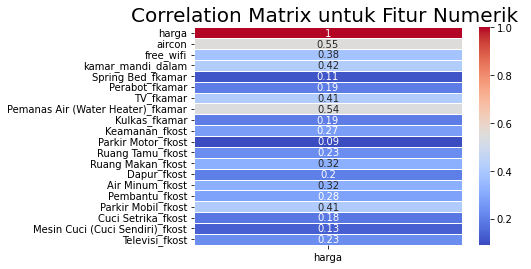

In [15]:
korelasi_harga = correlation_matrix[['harga']]
sns.heatmap(data=korelasi_harga, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [16]:
# Mempertahankan feature dengan korelasi di atas 0.25
korelasi_tinggi = korelasi_harga[korelasi_harga['harga'] >= 0.25]

korelasi_tinggi

,harga
harga,1.00
aircon,0.55
free_wifi,0.38
kamar_mandi_dalam,0.42
TV_fkamar,0.41
Pemanas Air (Water Heater)_fkamar,0.54
Keamanan_fkost,0.27
Ruang Makan_fkost,0.32
Air Minum_fkost,0.32
Pembantu_fkost,0.28


In [17]:
# kost_clean = kost_clean[korelasi_tinggi.index.to_list()]

# kost_clean

In [18]:
# Semua feature
kost_clean = kost_clean[korelasi_harga.index.to_list()]

kost_clean

,harga,aircon,free_wifi,kamar_mandi_dalam,Spring Bed_fkamar,Perabot_fkamar,TV_fkamar,Pemanas Air (Water Heater)_fkamar,Kulkas_fkamar,Keamanan_fkost,Parkir Motor_fkost,Ruang Tamu_fkost,Ruang Makan_fkost,Dapur_fkost,Air Minum_fkost,Pembantu_fkost,Parkir Mobil_fkost,Cuci Setrika_fkost,Mesin Cuci (Cuci Sendiri)_fkost,Televisi_fkost
0,1000000,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,2200000,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0
2,850000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2700000,1,1,1,1,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0
4,2500000,1,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,2200000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
868,1100000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
869,1900000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
870,1400000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
len(korelasi_harga.index.to_list())

20

In [20]:
# Pembagian data latih dan data uji
from sklearn.model_selection import train_test_split

X = kost_clean.drop(['harga'], axis=1)
y = kost_clean['harga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [21]:
print(f"""
Total Dataset: {len(X)}
Train Dataset: {len(X_train)}
Test Dataset: {len(X_test)}
""")


Total Dataset: 872
Train Dataset: 697
Test Dataset: 175



In [22]:
models = pd.DataFrame(
    index=['train_mse', 'test_mse'],
    columns=['KNN', 'RandomForest', 'Boosting'])

In [23]:
# Melakukan pelatihan menggunakan KNN
from sklearn.neighbors import KNeighborsRegressor

# Inisiasi KNN
knn = KNeighborsRegressor(n_neighbors=10)
# Pelatihan terhadap data latih
knn.fit(X_train, y_train)
# Melakukan prediksi terhadap data latih
y_pred_knn = knn.predict(X_train)

In [24]:
y_pred_knn[:5]

array([2880000., 1555000., 1975000., 1375000., 2795000.])

In [25]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=50, n_jobs=-1, random_state=55)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, random_state=55)

In [27]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mae = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mae.loc[name, 'train'] = round(mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train)))
    mae.loc[name, 'test'] = round(mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test)))

# Panggil mae
mae

,train,test
KNN,444631,420229
RF,294293,425214
Boosting,498665,482276


In [28]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mae = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mae.loc[name, 'train'] = round(mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train)))
    mae.loc[name, 'test'] = round(mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test)))

# Panggil mae
mae

,train,test
KNN,444631,420229
RF,294293,425214
Boosting,498665,482276


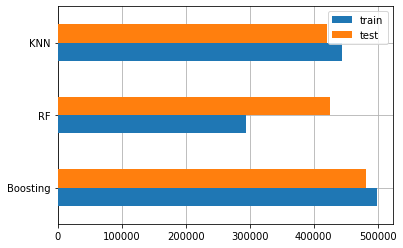

In [29]:
fig, ax = plt.subplots()
mae.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

<AxesSubplot:xlabel='harga'>

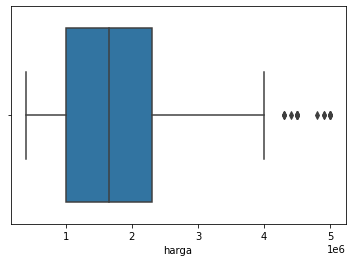

In [30]:
sns.boxplot(x=y_train)

<AxesSubplot:>

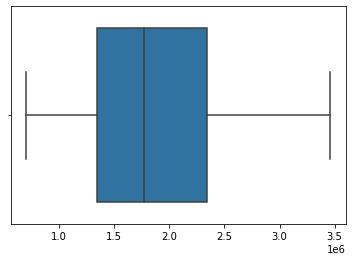

In [31]:
sns.boxplot(x=knn.predict(X_train))

<AxesSubplot:>

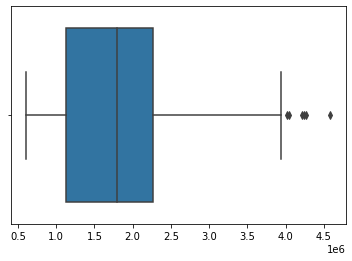

In [32]:
sns.boxplot(x=RF.predict(X_train))

<AxesSubplot:>

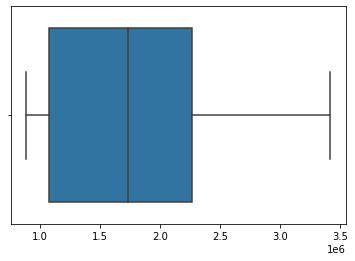

In [33]:
sns.boxplot(x=boosting.predict(X_train))

In [34]:
dir(boosting)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_boost',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_median_predict',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_validate_data',
 '_validate_estimator',
 'base_estimator',
 'base_estimator_',
 'estimator_errors_',
 'estimator_params',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_par

In [35]:
dir(RF)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 

In [36]:
boosting.feature_importances_

array([4.88888002e-01, 8.77585632e-04, 1.95554193e-02, 1.32495311e-02,
       0.00000000e+00, 1.57253727e-03, 3.37902464e-01, 1.89608374e-03,
       4.55251646e-03, 7.36333089e-02, 1.51275949e-03, 1.57431474e-03,
       4.26725709e-03, 1.45170210e-04, 1.22454007e-03, 4.40186607e-02,
       5.12985004e-03, 0.00000000e+00, 0.00000000e+00])

In [37]:
boosting.feature_names_in_

array(['aircon', 'free_wifi', 'kamar_mandi_dalam', 'Spring Bed_fkamar',
       'Perabot_fkamar', 'TV_fkamar', 'Pemanas Air (Water Heater)_fkamar',
       'Kulkas_fkamar', 'Keamanan_fkost', 'Parkir Motor_fkost',
       'Ruang Tamu_fkost', 'Ruang Makan_fkost', 'Dapur_fkost',
       'Air Minum_fkost', 'Pembantu_fkost', 'Parkir Mobil_fkost',
       'Cuci Setrika_fkost', 'Mesin Cuci (Cuci Sendiri)_fkost',
       'Televisi_fkost'], dtype=object)

In [38]:
RF.feature_importances_

array([0.33080917, 0.02047041, 0.029756  , 0.03121088, 0.02268669,
       0.02169005, 0.2332287 , 0.02140481, 0.02789561, 0.04128918,
       0.02298896, 0.03303518, 0.02357318, 0.02034264, 0.02143052,
       0.03509705, 0.02009496, 0.01995203, 0.02304398])

In [39]:
RF.feature_names_in_

array(['aircon', 'free_wifi', 'kamar_mandi_dalam', 'Spring Bed_fkamar',
       'Perabot_fkamar', 'TV_fkamar', 'Pemanas Air (Water Heater)_fkamar',
       'Kulkas_fkamar', 'Keamanan_fkost', 'Parkir Motor_fkost',
       'Ruang Tamu_fkost', 'Ruang Makan_fkost', 'Dapur_fkost',
       'Air Minum_fkost', 'Pembantu_fkost', 'Parkir Mobil_fkost',
       'Cuci Setrika_fkost', 'Mesin Cuci (Cuci Sendiri)_fkost',
       'Televisi_fkost'], dtype=object)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [41]:
model_lr = LinearRegression().fit(X_train, y_train)

In [44]:
r_sq = model_lr.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5202380176751382


In [46]:
y_pred_A = model_lr.predict(X_train)

y_pred_A[:5]

array([2957756.66751808, 1043969.99212934, 1992063.12008724,
       1582277.23927143, 2847167.60397927])

In [47]:
r2 = r2_score(y_train, y_pred_A)
print('r2 score model is', r2)

r2 score model is 0.5202380176751382


In [48]:
def adjr(r2, n, predictor_length):
  return 1-(1-r2)*(n-1)/(n-predictor_length-1)

In [49]:
adjr2_B = adjr(r2, len(y_train), 19)
print('adjusted r2 score model_B is', adjr2_B)

adjusted r2 score model_B is 0.5067735011844847


In [52]:
model_lr.intercept_

925740.7338215604

In [57]:
model_lr.coef_

array([ 693463.78676888,  105684.44413394,  372858.59949681,
        -50821.3977409 ,  -73277.41714019,   57078.11000255,
        766173.75520274,  193172.31081208,   88120.51353962,
       -463024.89035973,   11889.17677972,  207718.72893124,
        -18512.91057186,  101118.1054842 ,  -74154.41007045,
        272112.52860019,   -9487.15728976,  -91903.04340404,
        -74999.85289905])

In [56]:
model_lr.feature_names_in_

array(['aircon', 'free_wifi', 'kamar_mandi_dalam', 'Spring Bed_fkamar',
       'Perabot_fkamar', 'TV_fkamar', 'Pemanas Air (Water Heater)_fkamar',
       'Kulkas_fkamar', 'Keamanan_fkost', 'Parkir Motor_fkost',
       'Ruang Tamu_fkost', 'Ruang Makan_fkost', 'Dapur_fkost',
       'Air Minum_fkost', 'Pembantu_fkost', 'Parkir Mobil_fkost',
       'Cuci Setrika_fkost', 'Mesin Cuci (Cuci Sendiri)_fkost',
       'Televisi_fkost'], dtype=object)